# Bike Rentals - Prediction of Demand

In this project we will use a few different machine learning models in order to try and predict the demand of rental bikes on a given day. In order to train our models we will use a bike sharing [data set](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) available on the UCI Machine learning repository. In this data set the amount of bicycles rented in any given hour on any given day is reported.

The project will be subdivided as follows:
* Data Exploration and Processing
* Training models
* Evaluating

## Data Exploration and Processing

In the exploration part we will first read in the data into a data frame and explore its structure. Following that we will plot a histogram of the total rental counts, the value we will be trying to predict, for each hour. Finally, we will explore the how do other columns correlate to the target value.

In [4]:
import pandas as pd
%matplotlib inline

# reading in the data and visualizing the data frame

bike_rentals = pd.read_csv("bike_rental_hour.csv")
bike_rentals.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

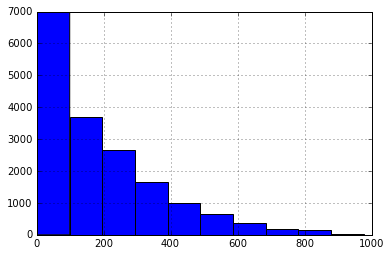

In [5]:
bike_rentals["cnt"].hist()

Histogram of rental counts shows that lower rental counts are more likely.

In [6]:
bike_rentals.corr()

instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.074505 -0.149773 -0.008740 -0.135386  0.137252  0.003988   
casual      0.158295  0.120206  0.142779  0.068457  0.301202  0.031564   
registered  0.282046  0.174226  0.253684  0.122273  0.374141 -0.047345   
cnt         0.278379  0.178056  0.250495  0.120638  0.394071 -0.030927   

             weekday  workingday  weathersit      temp     atemp       hum  \
instant     0.001357   -0.003416   -0.014198  0.136178  0.137615  0.009577   
season     -0.002335    0.013743   -0.014524  0.312025  0.319380  0.150625   
yr         -0.004485   -0.002196   -0.019157  0.040913  0.039222 -0.083546   
mnth        0.010400   -0.003477    0.005400  0.201691  0.208096  0.164411   
hr         -0.003498    0.002285   -0.020203  0.137603  0.133750 -0.276498   
holiday    -0.102088   -0.252471   -0.017036 -0.027340 -0.030973 -0.010588   
weekday     1.000000    0.035955    0.003311 -0.001795 -0.008821 -0.037158   
workingday  0.035955    1.000000    0.044672  0.055390  0.054667  0.015688   
weathersit  0.003311    0.044672    1.000000 -0.102640 -0.105563  0.418130   
temp       -0.001795    0.055390   -0.102640  1.000000  0.987672 -0.069881   
atemp      -0.008821    0.054667   -0.105563  0.987672  1.000000 -0.051918   
hum        -0.037158    0.015688    0.418130 -0.069881 -0.051918  1.000000   
windspeed   0.011502   -0.011830    0.026226 -0.023125 -0.062336 -0.290105   
casual      0.032721   -0.300942   -0.152628  0.459616  0.454080 -0.347028   
registered  0.021578    0.134326   -0.120966  0.335361  0.332559 -0.273933   
cnt         0.026900    0.030284   -0.142426  0.404772  0.400929 -0.322911   

            windspeed    casual  registered       cnt  
instant     -0.074505  0.158295    0.282046  0.278379  
season      -0.149773  0.120206    0.174226  0.178056  
yr          -0.008740  0.142779    0.253684  0.250495  
mnth        -0.135386  0.068457    0.122273  0.120638  
hr           0.137252  0.301202    0.374141  0.394071  
holiday      0.003988  0.031564   -0.047345 -0.030927  
weekday      0.011502  0.032721    0.021578  0.026900  
workingday  -0.011830 -0.300942    0.134326  0.030284  
weathersit   0.026226 -0.152628   -0.120966 -0.142426  
temp        -0.023125  0.459616    0.335361  0.404772  
atemp       -0.062336  0.454080    0.332559  0.400929  
hum         -0.290105 -0.347028   -0.273933 -0.322911  
windspeed    1.000000  0.090287    0.082321  0.093234  
casual       0.090287  1.000000    0.506618  0.694564  
registered   0.082321  0.506618    1.000000  0.972151  
cnt          0.093234  0.694564    0.972151  1.000000

Stronger correlation to the count variable comes from the registerd and casual counts, which is not surprising as the total count is the sum of two. Second strongest correlation is with the temperature, the adjusted temperature, and the hour of the day.

To make the machine learning model more accurate we could group the hour column into specific times of the day, so the model is able to tell the difference between different hours.

In [9]:
def assign_label(hour):
    if hour >= 6 and hour < 12: # morning
        return 1
    elif hour >= 12 and hour < 18: # afternoon
        return 2
    elif hour >= 18 and hour < 24: # evening
        return 3
    elif hour >= 0 and hour < 6: # night
        return 4
    
# creating a new feature indicating the time of the day

bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

Before we can start applying machine learning methods we need to split the data set into a training and test sets. We also import the error metric, in this case we choose to use the root mean squared error because the response is numerical.

In [23]:
from sklearn.metrics import mean_squared_error

train = bike_rentals.sample(frac=.8, random_state=141)
test_index = bike_rentals.index.isin(train.index)
test = bike_rentals.loc[~test_index]

## Model Training

As we already saw when calculating correlation, it doesn't make much sense including casual and registered count when predicting the total count, because total count is the sum of the two. The date column can not be used by the regression model in its current format, and is redundant anyway. Instant column should also be unrelated to the response variable, because it is just a unique identifier for the observation. We also replaced the hour value with a time of day label which will made the information in the hour redundant. First model we will construct is going to be a linear regressor.

### Linear Regression

In [48]:
# select predictors for the model
predictors = ['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'time_label']

from sklearn.linear_model import LinearRegression
import numpy as np

lr = LinearRegression() # instantiate the model
lr.fit(train[predictors], train["cnt"]) # train the model with train data
predictions = lr.predict(test[predictors]) # predict test data using trained model

# calculate the root mean squared error of the trained model
mse = mean_squared_error(test["cnt"], predictions)
rmse = np.sqrt(mse)

print("Linear regresion model error: ", rmse)

Linear regresion model error:  138.72124559578893


Given that most of the data is distributed in the range from 0 to 400 bike rentals, and error of 138.72 indicates that the linear regression model might be too simple for this purpose and is very likely underfitting.

### Decision Tree Regression

In [49]:
from sklearn.tree import DecisionTreeRegressor

# training a decision tree regressor and making predictions on test data
dtr = DecisionTreeRegressor(max_depth=10, min_samples_leaf=20)
dtr.fit(train[predictors], train["cnt"])
predictions = dtr.predict(test[predictors])

# calculating the root mean squared error
mse = mean_squared_error(test["cnt"], predictions)
rmse = np.sqrt(mse)

print("Decision tree regressor error: ", rmse)

Decision tree regressor error:  116.93319681532465


Pure decision tree regressor does much worse on the test data than the linear regressor, in this case this is result of overfiting. However, if we restrict the tree depth and the minimum amount of samples required for a node to be a leaf we arrive at significantly lower error compared to the linear regression model.

### Random Forest Regression

In [69]:
from sklearn.ensemble import RandomForestRegressor

# train a random forest regressor and make predictions on the test data
rf = RandomForestRegressor(n_estimators=150, min_samples_leaf=4, max_depth=20)
rf.fit(train[predictors], train["cnt"])
predictions = rf.predict(test[predictors])

# calculate the root mean square error
mse = mean_squared_error(test["cnt"], predictions)
rmse = np.sqrt(mse)

print("Random forest regressor error: ", rmse)

Random forest regressor error:  110.00500374833585


Even the default random forest model outperforms both the decision tree and linear regressors. By restricting the maximum depth of individual trees in the ensemble and defining the minimum number of observations a leaf node must contain, we arrive at even lower prediction error. However, this improvment is less substantial compared to the case where we vary these parameters for a single decision tree.

## Conclusion

We have seen that to predict the bike rental count at different times of the day, a random forest classifier does the best job when compared to the linear and decision trees regressors. Linear regressors do not pick up the evenutual non-linearities and consequently they underfit the data. On the contrary decision trees can pick up all the variations in data, including the noise, making them at risk to overfit the data. Random forests are more 